# Aufgaben Blatt 4 KI Machine Learning I



## Aufgabe 1 (Lineare Regression)

Bearbeiten Sie die Aufgabe https://github.com/oduerr/ki/blob/main/linear_regression/lr_gradient_descent.ipynb

Versuchen Sie den Code zu verstehen und machen die kleineren Aufgaben, die in dem notebook besprochen werden.

## Aufgabe 2 (Titanic)
In dieser Aufgabe nehmen Sie an der Titanic Challenge (https://www.kaggle.com/c/titanic) teil. Sie können die Aufgabe am eigenen PC lösen oder direkt in Kaggle lösen. Die Daten liegen auch auf Moodle. 

a) Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Trainigsdatenset eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?  

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


def run(data, model):
    # Daten aufteilen
    training_data = data.sample(frac=0.8)
    validating_data = data.drop(training_data.index)

    X_train = training_data.drop(columns=['Survived'])
    y_train = training_data['Survived']

    X_validate = validating_data.drop(columns=['Survived'])
    y_validate = validating_data['Survived']

    # Regel finden
    model.fit(X_train, y_train)

    # Regel auf Validierungsdaten anwenden
    y_pred = model.predict(X_validate)

    # Auswertung
    accuracy = accuracy_score(y_validate, y_pred)
    print("Validation Accuracy:", accuracy)
    
    return model

In [2]:
# Daten einlesen
train_data_all = pd.read_csv('titanic/train.csv')

# Daten aufbereiten
train_data = train_data_all[['Survived', 'Pclass']]

model_simple = run(train_data, LogisticRegression())

Validation Accuracy: 0.6629213483146067


b) Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch. 

In [3]:
# Daten einlesen
test_data = pd.read_csv('titanic/test.csv')

# Regel anwenden
pred_survived = model_simple.predict(test_data[['Pclass']])

# Ergebnisse speichern
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_survived})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


c) Logistische Regression mit Pclass

Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse `sklearn.linear_model.LogisticRegression`. Berechnen Sie die Accuracy auf dem Validierungsset.

d) Coding / Feature engineering 

d.i) Missing Values:

Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)

In [12]:
# Daten aufbereiten
train_data = train_data_all[['Survived', 'Pclass', 'Age']]

imputer = SimpleImputer(strategy='median')
train_data.loc[:, 'Age'] = imputer.fit_transform(train_data[['Age']])

_ = run(train_data, LogisticRegression())

Validation Accuracy: 0.7584269662921348


d.ii) Kategorische Variable

Verwenden Sie die Funktion `pd.get_dummies` um die Variablen 'Pclass' and 'Sex' in numerische Werte umzuwandeln. Führen Sie nun eine logistische Regression durch.

In [13]:
# Daten aufbereiten
train_data = train_data_all[['Survived', 'Pclass', 'Sex', 'Age']]

imputer = SimpleImputer(strategy='median')
train_data.loc[:, 'Age'] = imputer.fit_transform(train_data[['Age']])
train_data = pd.concat([train_data.drop(columns=['Sex']), pd.get_dummies(train_data[['Sex']])], axis=1)

train_data = pd.concat([train_data.drop(columns=['Pclass']), pd.get_dummies(train_data[['Pclass']])], axis=1)

_ = run(train_data, LogisticRegression())

Validation Accuracy: 0.8370786516853933


e) Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [14]:
# Daten aufbereiten
train_data = train_data_all[['Survived', 'Pclass', 'Sex', 'Age']]

imputer = SimpleImputer(strategy='median')
train_data.loc[:, 'Age'] = imputer.fit_transform(train_data[['Age']])
train_data = pd.concat([train_data.drop(columns=['Sex']), pd.get_dummies(train_data[['Sex']])], axis=1)

train_data = pd.concat([train_data.drop(columns=['Pclass']), pd.get_dummies(train_data[['Pclass']])], axis=1)
_ = run(train_data, RandomForestClassifier())

Validation Accuracy: 0.7415730337078652


f) [optional] Versuchen Sie weitere Features zu erzeugen und laden den besten Klassifikator auf Kaggle hoch. 

## Aufgabe 3 Titanic mit Neuronalen Netzen 

Hinweis: Diese Aufgabe kann erst nach der dritten Vorlesung in ML gemacht werden.

Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Trainingsdaten. Verwenden Sie mindestens zwei hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch. 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6248 - loss: 0.6634 - val_accuracy: 0.6425 - val_loss: 0.6553
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6189 - loss: 0.6651 - val_accuracy: 0.6425 - val_loss: 0.6549
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - loss: 0.6748 - val_accuracy: 0.6425 - val_loss: 0.6546
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.6606 - val_accuracy: 0.6425 - val_loss: 0.6544
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5979 - loss: 0.6737 - val_accuracy: 0.6425 - val_loss: 0.6546
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 0.6670 - val_accuracy: 0.6425 - val_loss: 0.6540
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 0.6605 - val_accuracy: 0.6425 - val_loss: 0.6535
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5833 - loss: 0.6797 - val_accuracy: 0.6425 - 

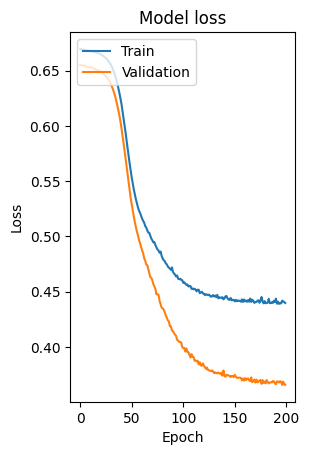

In [15]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Daten aufbereiten
train_data = train_data_all[['Survived', 'Pclass', 'Sex', 'Age']]

imputer = SimpleImputer(strategy='median')
train_data.loc[:, 'Age'] = imputer.fit_transform(train_data[['Age']])
train_data = pd.concat([train_data.drop(columns=['Sex']), pd.get_dummies(train_data[['Sex']])], axis=1)
train_data = pd.concat([train_data.drop(columns=['Pclass']), pd.get_dummies(train_data[['Pclass']])], axis=1)

X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

model = Sequential(
    [
        Input(batch_shape=(None, X_train.shape[1])),
        Dense(5, activation='sigmoid'),
        Dense(5, activation='sigmoid'),
        Dense(5, activation='sigmoid'),
        Dense(5, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ]
)

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.2,
    verbose=1
)

# Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()